## <font color = '#374259'> Sentiment vs. Return Rate - classification

#3 BITCOIN

>Algorithms:
    <ol>
    <li>Logistic Regression</li>
    <li>K-Nearest Neighbors (KNN)</li>
    <li>Support Vector Machines (SVM)</li>
    <li>Naive Bayes Classifier - Bernoulli, Gaussian, Multinomial</li>
    <li>Decision Trees</li>
    <li>Random Forest(RF)</li>
    <li>Adaptive Boosting</li>
    <li>eXtreme Gradient Boosting (XGBoost)</li>
    <li>Catboost</li>
    <li>Light Gradient Boosting Machine (LGBM)</li>
    </ol>
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Libraries for algorithms:

!! Don't forget to use hyperparameter tuning to get better performance

In [2]:
# Grid Search or RandomizedSearchCV for hyperparameter tuning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold, learning_curve
# Metrics
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report, precision_score, recall_score,auc,roc_curve, roc_auc_score, ConfusionMatrixDisplay 
# Logistic Regresion
from sklearn.linear_model import LogisticRegression
# Naive Bayes Classifiers
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB 
# Support Vector Machines
from sklearn.svm import LinearSVC, SVC
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
# Decision Trees + Random Forest
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
# Boosting Algorithms
from sklearn.ensemble import AdaBoostClassifier
import xgboost
from xgboost import XGBClassifier
import lightgbm
from lightgbm import LGBMClassifier
import catboost
from catboost import CatBoostClassifier
from sklearn.calibration import CalibratedClassifierCV

from sklearn import gaussian_process, neural_network

In [3]:
tweets = pd.read_csv('../data/final tweets.csv')
stocks = pd.read_csv('../data/stocks_data.csv')
vader_indicators_daily = pd.read_csv('../data/indicators_VADER_sentiment.csv')

In [4]:
tweets.head()
tweets.drop('date.1', axis = 1, inplace = True)
tweets.head()

,date,tweet,tweet_clean_func,tweet_emojis,tweet_clean,hashtag,vader_clean_scores,vader_clean_compound,vader_negative,vader_positive,vader_neutral,vader_clean_sentiment,vader_clean_polarity,blob_polarity,blob_subjectivity,blob_sentiment,sentiment_flair,probability_flair,classified_similarly
0,2010-06-04,"Please ignore prior tweets, as that was someon...","['please', 'ignore', 'prior', 'tweet', 'a', 't...",[],please ignore prior tweet someone pretending a...,[],"{'neg': 0.245, 'neu': 0.392, 'pos': 0.363, 'co...",0.0516,0.245,0.363,0.392,positive,0.194079,0.00,0.050000,neutral,NEGATIVE,0.999413,0
1,2011-12-01,Went to Iceland on Sat to ride bumper cars on ...,"['went', 'to', 'iceland', 'on', 'sat', 'to', '...",[],went iceland sat ride bumper car ice country v...,[],"{'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'comp...",0.8126,0.000,0.363,0.637,positive,1.000000,0.65,0.600000,positive,POSITIVE,0.996815,1
2,2011-12-01,I made the volume on the Model S http://t.co/...,"['i', 'made', 'the', 'volume', 'on', 'the', 'm...",[],made volume model go need work miniature stone...,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral,NaN,0.00,0.000000,neutral,POSITIVE,0.953198,1
3,2011-12-03,"Great Voltaire quote, arguably better than Twa...","['great', 'voltaire', 'quote', 'arguably', 'be...",[],great voltaire quote arguably better twain hea...,[],"{'neg': 0.239, 'neu': 0.364, 'pos': 0.397, 'co...",0.5994,0.239,0.397,0.364,positive,0.248428,0.55,0.633333,positive,NEGATIVE,0.969831,1
4,2011-12-03,That was a total non sequitur btw,"['that', 'wa', 'a', 'total', 'non', 'sequitur'...",[],total non sequitur btw,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral,NaN,0.00,0.750000,neutral,POSITIVE,0.954011,1


In [5]:
columns_to_drop = ['blob_polarity','blob_subjectivity', 'blob_sentiment', 'sentiment_flair','probability_flair',
                   'classified_similarly']
tweets.drop(columns_to_drop, axis = 1, inplace=True)

In [6]:
tweets.isna().sum()

date                        0
tweet                       0
tweet_clean_func            0
tweet_emojis                0
tweet_clean              1267
hashtag                     0
vader_clean_scores          0
vader_clean_compound        0
vader_negative              0
vader_positive              0
vader_neutral               0
vader_clean_sentiment       0
vader_clean_polarity     8638
dtype: int64

In [7]:
tweets['vader_clean_polarity'].fillna(0, inplace=True)
tweets['tweet_clean'].fillna('', inplace=True)

In [8]:
tweets.isna().sum()

date                     0
tweet                    0
tweet_clean_func         0
tweet_emojis             0
tweet_clean              0
hashtag                  0
vader_clean_scores       0
vader_clean_compound     0
vader_negative           0
vader_positive           0
vader_neutral            0
vader_clean_sentiment    0
vader_clean_polarity     0
dtype: int64

In [9]:
stocks.head()
stocks = stocks.rename(columns = {'Date':'date'})
stocks.head()

,date,Close_Tsla,Volume_Tsla,simple_return_Tsla,log_return_Tsla,Close_Tsla_Rescaled,Close_Btc,Volume_Btc,simple_return_Btc,log_return_Btc,Close_Btc_Rescaled,Close_Doge,Volume_Doge,simple_return_Doge,log_return_Doge,Close_Doge_Rescaled,label_rt_Tsla,label_rt_Btc,label_rt_Doge
0,2010-06-29,1.592667,281494500,NaN,NaN,0.001319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1,2010-06-30,1.588667,257806500,-0.002511,-0.002515,0.001309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2,2010-07-01,1.464000,123282000,-0.078473,-0.081723,0.001004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
3,2010-07-02,1.280000,77097000,-0.125683,-0.134312,0.000554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
4,2010-07-06,1.074000,103003500,-0.160937,-0.175470,0.000051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


- Create 3 dfs for each stock:
    1. Tesla
    2. Dogecoin
    3. Bitcoin
- Merge Vader Sentiment Indicators with each df


In [10]:
columns_tesla = ['date', 'Close_Tsla', 'Volume_Tsla', 'simple_return_Tsla', 'log_return_Tsla',
                 'Close_Tsla_Rescaled', 'label_rt_Tsla']

columns_bitcoin = ['date', 'Close_Btc', 'Volume_Btc', 'simple_return_Btc','log_return_Btc', 
                   'Close_Btc_Rescaled', 'label_rt_Btc']

columns_dogecoin = ['date', 'Close_Doge', 'Volume_Doge','simple_return_Doge', 'log_return_Doge', 
                    'Close_Doge_Rescaled', 'label_rt_Doge']

tesla_df = stocks[columns_tesla]
bitcoin_df = stocks[columns_bitcoin]
dogecoin_df = stocks[columns_dogecoin]

In [11]:
vader_indicators_daily.head()

,date,vader_clean_compound,vader_clean_polarity,vader_negative,vader_positive,vader_neutral
0,2010-06-04,0.051600,0.194079,0.245000,0.363000,0.392000
1,2011-12-01,0.406300,1.000000,0.000000,0.181500,0.818500
2,2011-12-03,0.299700,0.248428,0.119500,0.198500,0.682000
3,2011-12-04,0.734600,1.000000,0.000000,0.508000,0.492000
4,2011-12-21,0.269667,0.477783,0.121167,0.264833,0.613833


In [12]:
vader_indicators_daily.set_index('date', inplace=True)

### <font color = '#F2D8D8'>BITCOIN

In [13]:
bitcoin_df.shape

(3241, 7)

In [14]:
bitcoin_df

,date,Close_Btc,Volume_Btc,simple_return_Btc,log_return_Btc,Close_Btc_Rescaled,label_rt_Btc
0,2010-06-29,NaN,NaN,NaN,NaN,NaN,0
1,2010-06-30,NaN,NaN,NaN,NaN,NaN,0
2,2010-07-01,NaN,NaN,NaN,NaN,NaN,0
3,2010-07-02,NaN,NaN,NaN,NaN,NaN,0
4,2010-07-06,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...
3236,2023-05-08,27694.273438,1.912290e+10,-0.026734,-0.027097,0.408320,0
3237,2023-05-09,27658.775391,1.412859e+10,-0.001282,-0.001283,0.407793,0
3238,2023-05-10,27621.755859,2.065603e+10,-0.001338,-0.001339,0.407244,0
3239,2023-05-11,27000.789062,1.672434e+10,-0.022481,-0.022738,0.398029,0


In [15]:
bitcoin_df = bitcoin_df[bitcoin_df['date'] >= '2014-09-17']
bitcoin_df

,date,Close_Btc,Volume_Btc,simple_return_Btc,log_return_Btc,Close_Btc_Rescaled,label_rt_Btc
1062,2014-09-17,457.334015,2.105680e+07,NaN,NaN,0.004144,0
1063,2014-09-18,424.440002,3.448320e+07,-0.071926,-0.074643,0.003655,0
1064,2014-09-19,394.795990,3.791970e+07,-0.069843,-0.072402,0.003216,0
1065,2014-09-22,402.152008,2.412760e+07,0.008352,0.008317,0.003325,1
1066,2014-09-23,435.790985,4.509950e+07,0.083647,0.080333,0.003824,1
...,...,...,...,...,...,...,...
3236,2023-05-08,27694.273438,1.912290e+10,-0.026734,-0.027097,0.408320,0
3237,2023-05-09,27658.775391,1.412859e+10,-0.001282,-0.001283,0.407793,0
3238,2023-05-10,27621.755859,2.065603e+10,-0.001338,-0.001339,0.407244,0
3239,2023-05-11,27000.789062,1.672434e+10,-0.022481,-0.022738,0.398029,0


In [16]:
bitcoin_df.set_index('date', inplace=True)
bitcoin = pd.merge(bitcoin_df, vader_indicators_daily, left_index=True, right_index=True, how='left')
bitcoin

,Close_Btc,Volume_Btc,simple_return_Btc,log_return_Btc,Close_Btc_Rescaled,label_rt_Btc,vader_clean_compound,vader_clean_polarity,vader_negative,vader_positive,vader_neutral
date,,,,,,,,,,,
2014-09-17,457.334015,2.105680e+07,NaN,NaN,0.004144,0,0.589900,1.000000,0.000000,0.437000,0.563000
2014-09-18,424.440002,3.448320e+07,-0.071926,-0.074643,0.003655,0,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,3.791970e+07,-0.069843,-0.072402,0.003216,0,NaN,NaN,NaN,NaN,NaN
2014-09-22,402.152008,2.412760e+07,0.008352,0.008317,0.003325,1,NaN,NaN,NaN,NaN,NaN
2014-09-23,435.790985,4.509950e+07,0.083647,0.080333,0.003824,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-08,27694.273438,1.912290e+10,-0.026734,-0.027097,0.408320,0,0.199254,0.496062,0.077538,0.326231,0.596205
2023-05-09,27658.775391,1.412859e+10,-0.001282,-0.001283,0.407793,0,0.095414,0.313293,0.129093,0.275302,0.572302
2023-05-10,27621.755859,2.065603e+10,-0.001338,-0.001339,0.407244,0,0.181463,0.762771,0.036657,0.276943,0.629229


In [17]:
bitcoin = bitcoin[['label_rt_Btc', 'vader_clean_compound', 'vader_clean_polarity', 'vader_negative', 
               'vader_positive', 'vader_neutral']]
bitcoin.fillna(0, inplace=True)
bitcoin

/var/folders/yv/j0g0g70d35zb6gycr0585f9c0000gn/T/ipykernel_1796/3429906407.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin.fillna(0, inplace=True)


,label_rt_Btc,vader_clean_compound,vader_clean_polarity,vader_negative,vader_positive,vader_neutral
date,,,,,,
2014-09-17,0,0.589900,1.000000,0.000000,0.437000,0.563000
2014-09-18,0,0.000000,0.000000,0.000000,0.000000,0.000000
2014-09-19,0,0.000000,0.000000,0.000000,0.000000,0.000000
2014-09-22,1,0.000000,0.000000,0.000000,0.000000,0.000000
2014-09-23,1,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
2023-05-08,0,0.199254,0.496062,0.077538,0.326231,0.596205
2023-05-09,0,0.095414,0.313293,0.129093,0.275302,0.572302
2023-05-10,0,0.181463,0.762771,0.036657,0.276943,0.629229


In [18]:
X = bitcoin.drop('label_rt_Btc', axis = 1) 
y = bitcoin['label_rt_Btc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state=1234)

In [19]:
X_train.shape

(1634, 5)

In [20]:
X_test.shape

(545, 5)

#### Create a summary for all models used in analysis

In [21]:
clf = [
    AdaBoostClassifier(n_estimators=50, random_state=1234),
    RandomForestClassifier(random_state=1234),
    GaussianNB(),
    CalibratedClassifierCV(LinearSVC()), # SVC does not have predict_proba, and is wrapped into CalibratedClassifierCV
    DecisionTreeClassifier(random_state=1234),
    XGBClassifier(n_estimators=50, random_state=1234),
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors=3),
    CatBoostClassifier(iterations=100, random_state=42),
    LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=1234),
    BernoulliNB()
    ]

In [22]:
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in clf:    
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index,'Classifier'] = clf_name
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    clf_compare.loc[row_index, 'Precission'] = precision_score(y_test, predicted)
    clf_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
    clf_compare.loc[row_index, 'AUC'] = round(roc_auc_score(y_test, alg.predict_proba(X_test)[:,1]),5)
    clf_compare.loc[row_index, 'F1 Score'] = f1_score(y_test, predicted)

    row_index+=1

Learning rate set to 0.104952
0:	learn: 0.6912277	total: 57.3ms	remaining: 5.67s
1:	learn: 0.6898307	total: 58ms	remaining: 2.84s
2:	learn: 0.6877491	total: 58.5ms	remaining: 1.89s
3:	learn: 0.6862367	total: 59.4ms	remaining: 1.42s
4:	learn: 0.6842089	total: 60.1ms	remaining: 1.14s
5:	learn: 0.6829368	total: 60.8ms	remaining: 953ms
6:	learn: 0.6814749	total: 61.7ms	remaining: 820ms
7:	learn: 0.6801196	total: 62.4ms	remaining: 718ms
8:	learn: 0.6790878	total: 63ms	remaining: 637ms
9:	learn: 0.6781791	total: 63.9ms	remaining: 575ms
10:	learn: 0.6774577	total: 64.6ms	remaining: 523ms
11:	learn: 0.6761495	total: 65.3ms	remaining: 479ms
12:	learn: 0.6753998	total: 66ms	remaining: 442ms
13:	learn: 0.6745040	total: 66.7ms	remaining: 409ms
14:	learn: 0.6739878	total: 67.5ms	remaining: 383ms
15:	learn: 0.6733387	total: 68.1ms	remaining: 358ms
16:	learn: 0.6726019	total: 68.9ms	remaining: 337ms
17:	learn: 0.6718169	total: 69.7ms	remaining: 318ms
18:	learn: 0.6712464	total: 70.5ms	remaining: 300m

In [23]:
clf_compare.sort_values(by = ['AUC'], ascending = False, inplace = True)    
clf_compare

,Classifier,Train Accuracy,Test Accuracy,Precission,Recall,AUC,F1 Score
6,LogisticRegression,0.5367,0.5450,0.549618,0.752613,0.55073,0.635294
3,CalibratedClassifierCV,0.5337,0.5394,0.538961,0.867596,0.54987,0.664887
1,RandomForestClassifier,0.8666,0.5193,0.537538,0.623693,0.52964,0.577419
10,BernoulliNB,0.5282,0.5266,0.573604,0.393728,0.52921,0.466942
8,CatBoostClassifier,0.6897,0.5174,0.534884,0.641115,0.52903,0.583201
0,AdaBoostClassifier,0.6108,0.5156,0.531507,0.675958,0.52590,0.595092
2,GaussianNB,0.5220,0.5119,0.544681,0.445993,0.52122,0.490421
5,XGBClassifier,0.8335,0.5303,0.546547,0.634146,0.52020,0.587097
9,LGBMClassifier,0.8188,0.5064,0.526163,0.630662,0.50452,0.573693
7,KNeighborsClassifier,0.7222,0.5064,0.526946,0.613240,0.50130,0.566828


#### <font color = '#545B77'> LOGISTIC REGRESSION


In [24]:
# lr = LogisticRegression(C = 1e-05, solver ='newton-cg')
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.31      0.40       258
           1       0.55      0.75      0.64       287

    accuracy                           0.54       545
   macro avg       0.54      0.53      0.52       545
weighted avg       0.54      0.54      0.52       545



#### From a total of 545 observations, 297 were correctly classified

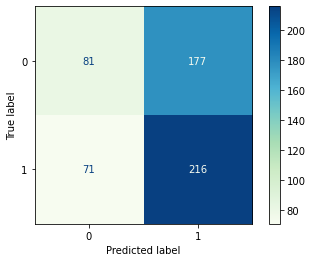

In [26]:
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [27]:
lr_cv_train = cross_val_score(lr, X_train, y_train, cv=5) 
lr_cv_train.mean()

0.5299938087465527

In [28]:
lr_cv_test = cross_val_score(lr, X_test, y_test, cv=5) 
lr_cv_test.mean()

0.5302752293577981

#### <font color = '#545B77'> K-NEAREST NEIGHBORS

In [29]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.39      0.43       258
           1       0.53      0.61      0.57       287

    accuracy                           0.51       545
   macro avg       0.50      0.50      0.50       545
weighted avg       0.50      0.51      0.50       545



#### From a total of 545 observations, 276 were correctly classified

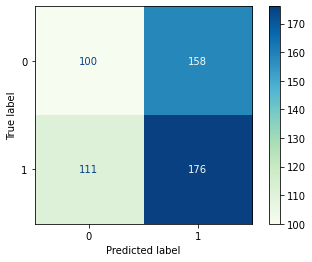

In [31]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [32]:
knn_cv_train = cross_val_score(knn, X_train, y_train, cv=5) 
knn_cv_train.mean()

0.5213973471417047

In [33]:
knn_cv_test = cross_val_score(knn, X_test, y_test, cv=5) 
knn_cv_test.mean()

0.47889908256880737

#### <font color = '#545B77'> SUPPORT VECTOR MACHINES


In [34]:
svm_linear = SVC( kernel = 'linear')
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       258
           1       0.53      1.00      0.69       287

    accuracy                           0.53       545
   macro avg       0.26      0.50      0.34       545
weighted avg       0.28      0.53      0.36       545



/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

#### From a total of 545 observations, 287 were correctly classified

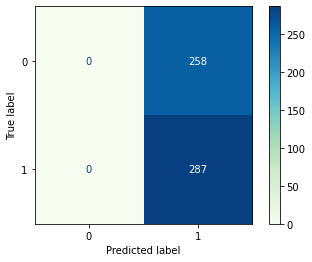

In [36]:
cm = confusion_matrix(y_test, y_pred, labels=svm_linear.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_linear.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [37]:
svm_linear_train_cv = cross_val_score(svm_linear, X_train, y_train, cv=5)
svm_linear_train_cv.mean()

0.5195662370312002

In [38]:
svm_linear_test_cv = cross_val_score(svm_linear, X_test, y_test, cv=5)
svm_linear_test_cv.mean()

0.5027522935779818

#### <font color = '#545B77'> DECISION TREES


In [39]:
tree = DecisionTreeClassifier(random_state=1234)
tree.fit(X_train, y_train) 
y_pred = tree.predict(X_test)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       258
           1       0.52      0.61      0.56       287

    accuracy                           0.50       545
   macro avg       0.49      0.49      0.49       545
weighted avg       0.49      0.50      0.49       545



#### From a total of 545 observations, 272 were correctly classified

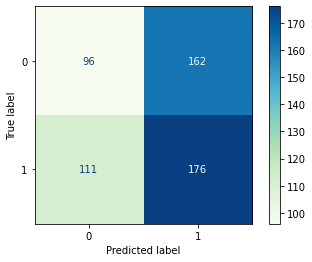

In [41]:
cm = confusion_matrix(y_test, y_pred, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [42]:
tree_cv_train = cross_val_score(tree, X_train, y_train, cv=10) 
tree_cv_train.mean()

0.5183787221307796

In [43]:
tree_cv_test = cross_val_score(tree, X_test, y_test, cv=10) 
tree_cv_test.mean()

0.5173737373737373

#### <font color = '#545B77'> RANDOM FOREST


In [44]:
rf = RandomForestClassifier(random_state=1234)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.40      0.44       258
           1       0.54      0.62      0.58       287

    accuracy                           0.52       545
   macro avg       0.51      0.51      0.51       545
weighted avg       0.52      0.52      0.51       545



#### From a total of 545 observations, 283 were correctly classified

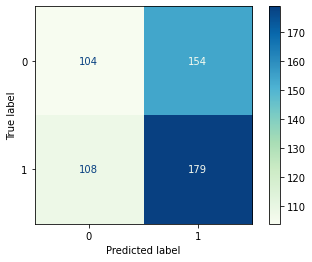

In [46]:
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [47]:
rf_cv_train = cross_val_score(rf, X_train, y_train, cv=5) 
rf_cv_train.mean()

0.5079566987486164

In [48]:
rf_cv_test = cross_val_score(rf, X_test, y_test, cv=5) 
rf_cv_test.mean()

0.5357798165137615

#### <font color = '#545B77'> MULTINOMIAL NAIVE BAYES


In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
X_minmax_train = scaler.fit_transform(X_train)
X_minmax_test = scaler.fit_transform(X_test)

naive = MultinomialNB()
# naive.fit(X_train, y_train)
# y_pred = naive.predict(X_test)
# Because Multinomial NB cannot work with negative values -- error: Negative values in data passed to MultinomialNB (input X)
#     we have to scale the features

naive.fit(X_minmax_train, y_train)
y_pred = naive.predict(X_minmax_test)

In [50]:
accuracy_score(y_test, y_pred)

0.5266055045871559

#### From a total of 545 observations, 287 were correctly classified

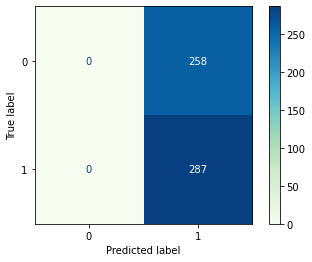

In [51]:
cm = confusion_matrix(y_test, y_pred, labels=naive.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=naive.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       258
           1       0.53      1.00      0.69       287

    accuracy                           0.53       545
   macro avg       0.26      0.50      0.34       545
weighted avg       0.28      0.53      0.36       545



/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

In [53]:
# Accuracy of naive bayes multinomial on train:
naive.score(X_minmax_train, y_train)

0.5269277845777234

In [54]:
# Accuracy of naive bayes multinomial on test:
naive.score(X_minmax_test, y_test)

0.5266055045871559

In [55]:
# Precision of naive bayes multinomial on test:
precision_score(y_test, y_pred)

0.5266055045871559

In [56]:
# Recall or senzitivity of naive bayes multinomial on test:
recall_score(y_test, y_pred)

1.0

In [57]:
# AUC of naive bayes multinomial on test:
round(roc_auc_score(y_test, naive.predict_proba(X_minmax_test)[:,1]),5)

0.53033

In [58]:
# F1 score of naive bayes multinomial on test:
f1_score(y_test, y_pred)

0.689903846153846

In [59]:
naive_cv_train = cross_val_score(naive, X_minmax_train, y_train, cv=10) 
naive_cv_train.mean()

0.5269302708364506

In [60]:
naive_cv_test = cross_val_score(naive, X_minmax_test, y_test, cv=10) 
naive_cv_test.mean()

0.5265993265993265

#### <font color = '#545B77'> BERNOULLI NB

In [61]:
bernoulli =  BernoulliNB()
bernoulli.fit(X_train, y_train)
# Predict on the test set
y_pred = bernoulli.predict(X_test)

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.67      0.57       258
           1       0.57      0.39      0.47       287

    accuracy                           0.53       545
   macro avg       0.54      0.53      0.52       545
weighted avg       0.54      0.53      0.52       545



#### From a total of 545 observations, 287 were correctly classified 

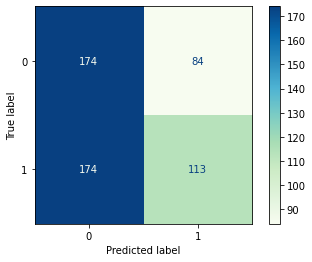

In [63]:
cm = confusion_matrix(y_test, y_pred, labels=bernoulli.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bernoulli.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [64]:
bernoulli_cv_train = cross_val_score(bernoulli, X_train, y_train, cv=5) 
bernoulli_cv_train.mean()

0.5269188195343426

In [65]:
bernoulli_cv_test = cross_val_score(bernoulli, X_test, y_test, cv=5) 
bernoulli_cv_test.mean()

0.5247706422018349

#### <font color = '#545B77'> GAUSSIAN NB

In [66]:
gaussian =  GaussianNB()
gaussian.fit(X_train, y_train)
# Predict on the test set
y_pred = gaussian.predict(X_test)

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.59      0.53       258
           1       0.54      0.45      0.49       287

    accuracy                           0.51       545
   macro avg       0.52      0.52      0.51       545
weighted avg       0.52      0.51      0.51       545



#### From a total of 545 observations, 279 were correctly classified 

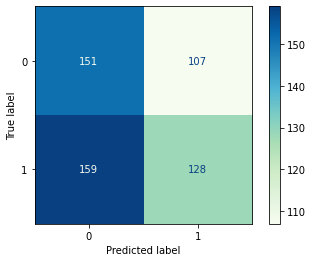

In [68]:
cm = confusion_matrix(y_test, y_pred, labels=gaussian.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gaussian.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [69]:
gaussian_cv_train = cross_val_score(gaussian, X_train, y_train, cv=5) 
gaussian_cv_train.mean()

0.5183580045402525

In [70]:
gaussian_cv_test = cross_val_score(gaussian, X_test, y_test, cv=5) 
gaussian_cv_test.mean()

0.5192660550458715

#### <font color = '#545B77'> ADAPTIVE BOOSTING


In [71]:
# Create an AdaBoost classifier
adaboost = AdaBoostClassifier(n_estimators=50, random_state=1234)

# Train the classifier
adaboost.fit(X_train, y_train)

# Predict on the test set
y_pred = adaboost.predict(X_test)

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       258
           1       0.53      0.68      0.60       287

    accuracy                           0.52       545
   macro avg       0.51      0.51      0.50       545
weighted avg       0.51      0.52      0.50       545



#### From a total of 545 observations, 281 were correctly classified 

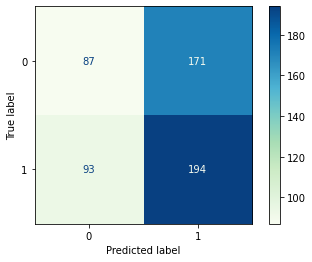

In [73]:
cm = confusion_matrix(y_test, y_pred, labels=adaboost.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=adaboost.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [74]:
adaboost_cv_train = cross_val_score(adaboost, X_train, y_train, cv=5) 
adaboost_cv_train.mean()

0.5208101161329055

In [75]:
adaboost_cv_test = cross_val_score(adaboost, X_test, y_test, cv=5) 
adaboost_cv_test.mean()

0.5321100917431193

#### <font color = '#545B77'> eXTREME GRADIENT BOOSTING (XGB)


In [76]:
# Create an XGBoost classifier
xgb = XGBClassifier(n_estimators=50, random_state=1234)

# Train the classifier
xgb.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb.predict(X_test)

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.41      0.46       258
           1       0.55      0.63      0.59       287

    accuracy                           0.53       545
   macro avg       0.53      0.52      0.52       545
weighted avg       0.53      0.53      0.52       545



#### From a total of 545 observations, 289 were correctly classified

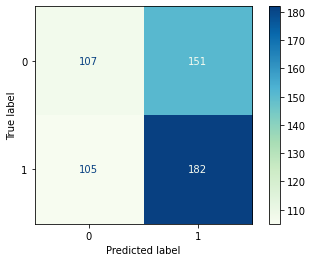

In [78]:
cm = confusion_matrix(y_test, y_pred, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [79]:
xgb_cv_train = cross_val_score(xgb, X_train, y_train, cv=10) 
xgb_cv_train.mean()

0.5244613197665718

In [80]:
xgb_cv_test = cross_val_score(xgb, X_test, y_test, cv=10) 
xgb_cv_test.mean()

0.5483164983164983

#### <font color = '#545B77'> CATBOOST

In [81]:
# Create a CatBoost classifier
catboost = CatBoostClassifier(iterations=100, random_state=42)

# Train the classifier
catboost.fit(X_train, y_train)

# Predict on the test set
y_pred = catboost.predict(X_test)

Learning rate set to 0.104952
0:	learn: 0.6912277	total: 863us	remaining: 85.4ms
1:	learn: 0.6898307	total: 1.61ms	remaining: 79.1ms
2:	learn: 0.6877491	total: 2.31ms	remaining: 74.9ms
3:	learn: 0.6862367	total: 2.91ms	remaining: 69.8ms
4:	learn: 0.6842089	total: 3.57ms	remaining: 67.9ms
5:	learn: 0.6829368	total: 4.45ms	remaining: 69.7ms
6:	learn: 0.6814749	total: 5.19ms	remaining: 68.9ms
7:	learn: 0.6801196	total: 5.97ms	remaining: 68.7ms
8:	learn: 0.6790878	total: 6.93ms	remaining: 70.1ms
9:	learn: 0.6781791	total: 7.82ms	remaining: 70.4ms
10:	learn: 0.6774577	total: 8.54ms	remaining: 69.1ms
11:	learn: 0.6761495	total: 9.22ms	remaining: 67.6ms
12:	learn: 0.6753998	total: 9.94ms	remaining: 66.5ms
13:	learn: 0.6745040	total: 10.7ms	remaining: 65.6ms
14:	learn: 0.6739878	total: 11.3ms	remaining: 64.3ms
15:	learn: 0.6733387	total: 12.1ms	remaining: 63.3ms
16:	learn: 0.6726019	total: 12.7ms	remaining: 62.2ms
17:	learn: 0.6718169	total: 13.4ms	remaining: 61ms
18:	learn: 0.6712464	total: 1

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.38      0.43       258
           1       0.53      0.64      0.58       287

    accuracy                           0.52       545
   macro avg       0.51      0.51      0.51       545
weighted avg       0.51      0.52      0.51       545



#### From a total of 545 observations, 282 were correctly classified 

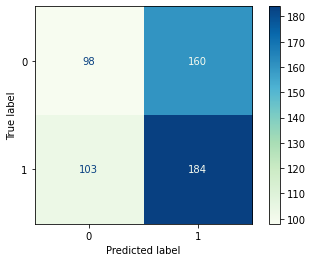

In [83]:
cm = confusion_matrix(y_test, y_pred, labels=catboost.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=catboost.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [84]:
catboost_cv_train = cross_val_score(catboost, X_train, y_train, cv=10) 
catboost_cv_train.mean()

Learning rate set to 0.100318
0:	learn: 0.6917337	total: 866us	remaining: 85.7ms
1:	learn: 0.6902871	total: 2ms	remaining: 97.9ms
2:	learn: 0.6887941	total: 3.01ms	remaining: 97.4ms
3:	learn: 0.6874018	total: 4.09ms	remaining: 98.3ms
4:	learn: 0.6852260	total: 4.97ms	remaining: 94.4ms
5:	learn: 0.6835486	total: 6.69ms	remaining: 105ms
6:	learn: 0.6820220	total: 7.87ms	remaining: 105ms
7:	learn: 0.6801660	total: 8.7ms	remaining: 100ms
8:	learn: 0.6790299	total: 9.53ms	remaining: 96.4ms
9:	learn: 0.6782078	total: 10.5ms	remaining: 94.8ms
10:	learn: 0.6777537	total: 11.6ms	remaining: 93.7ms
11:	learn: 0.6769970	total: 12.3ms	remaining: 90.5ms
12:	learn: 0.6762619	total: 13ms	remaining: 87.1ms
13:	learn: 0.6754442	total: 13.9ms	remaining: 85.4ms
14:	learn: 0.6746551	total: 14.8ms	remaining: 84.1ms
15:	learn: 0.6739511	total: 15.8ms	remaining: 82.8ms
16:	learn: 0.6731379	total: 16.5ms	remaining: 80.8ms
17:	learn: 0.6721830	total: 17.3ms	remaining: 79ms
18:	learn: 0.6714822	total: 18.3ms	rem

10:	learn: 0.6765756	total: 9.08ms	remaining: 73.5ms
11:	learn: 0.6758704	total: 10.1ms	remaining: 74.4ms
12:	learn: 0.6749757	total: 11ms	remaining: 73.4ms
13:	learn: 0.6741898	total: 11.9ms	remaining: 72.8ms
14:	learn: 0.6731837	total: 12.7ms	remaining: 71.7ms
15:	learn: 0.6724537	total: 13.6ms	remaining: 71.3ms
16:	learn: 0.6714085	total: 14.4ms	remaining: 70.1ms
17:	learn: 0.6708057	total: 15.2ms	remaining: 69.2ms
18:	learn: 0.6699668	total: 16.1ms	remaining: 68.8ms
19:	learn: 0.6694990	total: 16.9ms	remaining: 67.7ms
20:	learn: 0.6686185	total: 17.6ms	remaining: 66.3ms
21:	learn: 0.6675894	total: 18.3ms	remaining: 65ms
22:	learn: 0.6667570	total: 19ms	remaining: 63.5ms
23:	learn: 0.6660510	total: 19.5ms	remaining: 61.8ms
24:	learn: 0.6651964	total: 20.1ms	remaining: 60.3ms
25:	learn: 0.6644545	total: 20.9ms	remaining: 59.5ms
26:	learn: 0.6634590	total: 21.6ms	remaining: 58.5ms
27:	learn: 0.6624383	total: 22.3ms	remaining: 57.4ms
28:	learn: 0.6620386	total: 23.1ms	remaining: 56.5ms

93:	learn: 0.6262078	total: 52.9ms	remaining: 3.38ms
94:	learn: 0.6259298	total: 53.7ms	remaining: 2.83ms
95:	learn: 0.6252739	total: 54.4ms	remaining: 2.27ms
96:	learn: 0.6246934	total: 54.9ms	remaining: 1.7ms
97:	learn: 0.6243103	total: 55.5ms	remaining: 1.13ms
98:	learn: 0.6240369	total: 56.2ms	remaining: 567us
99:	learn: 0.6236293	total: 56.9ms	remaining: 0us
Learning rate set to 0.100347
0:	learn: 0.6915563	total: 590us	remaining: 58.4ms
1:	learn: 0.6901459	total: 1.25ms	remaining: 61.5ms
2:	learn: 0.6886365	total: 1.87ms	remaining: 60.6ms
3:	learn: 0.6859893	total: 2.41ms	remaining: 57.8ms
4:	learn: 0.6842841	total: 2.98ms	remaining: 56.6ms
5:	learn: 0.6830777	total: 3.51ms	remaining: 55ms
6:	learn: 0.6813131	total: 4.02ms	remaining: 53.4ms
7:	learn: 0.6803604	total: 4.52ms	remaining: 52ms
8:	learn: 0.6793870	total: 5.05ms	remaining: 51.1ms
9:	learn: 0.6780384	total: 5.54ms	remaining: 49.9ms
10:	learn: 0.6766449	total: 6.03ms	remaining: 48.8ms
11:	learn: 0.6759047	total: 6.57ms	r

51:	learn: 0.6469599	total: 30.6ms	remaining: 28.2ms
52:	learn: 0.6464765	total: 31.4ms	remaining: 27.9ms
53:	learn: 0.6457368	total: 32ms	remaining: 27.3ms
54:	learn: 0.6454557	total: 32.5ms	remaining: 26.6ms
55:	learn: 0.6446543	total: 33ms	remaining: 26ms
56:	learn: 0.6440644	total: 33.6ms	remaining: 25.3ms
57:	learn: 0.6437039	total: 34.3ms	remaining: 24.8ms
58:	learn: 0.6430379	total: 35ms	remaining: 24.3ms
59:	learn: 0.6423685	total: 35.8ms	remaining: 23.9ms
60:	learn: 0.6420682	total: 36.5ms	remaining: 23.4ms
61:	learn: 0.6418988	total: 37.2ms	remaining: 22.8ms
62:	learn: 0.6414990	total: 37.9ms	remaining: 22.2ms
63:	learn: 0.6409218	total: 38.5ms	remaining: 21.7ms
64:	learn: 0.6402367	total: 39ms	remaining: 21ms
65:	learn: 0.6395792	total: 39.6ms	remaining: 20.4ms
66:	learn: 0.6391520	total: 40.1ms	remaining: 19.8ms
67:	learn: 0.6386612	total: 40.6ms	remaining: 19.1ms
68:	learn: 0.6379756	total: 41.2ms	remaining: 18.5ms
69:	learn: 0.6372591	total: 41.7ms	remaining: 17.9ms
70:	l

8:	learn: 0.6794402	total: 4.51ms	remaining: 45.6ms
9:	learn: 0.6785014	total: 5.12ms	remaining: 46.1ms
10:	learn: 0.6774392	total: 5.66ms	remaining: 45.8ms
11:	learn: 0.6765552	total: 6.18ms	remaining: 45.3ms
12:	learn: 0.6759525	total: 6.69ms	remaining: 44.8ms
13:	learn: 0.6750938	total: 7.18ms	remaining: 44.1ms
14:	learn: 0.6740683	total: 7.66ms	remaining: 43.4ms
15:	learn: 0.6735091	total: 8.16ms	remaining: 42.9ms
16:	learn: 0.6723672	total: 8.72ms	remaining: 42.6ms
17:	learn: 0.6714295	total: 9.25ms	remaining: 42.1ms
18:	learn: 0.6708738	total: 9.75ms	remaining: 41.6ms
19:	learn: 0.6702175	total: 10.3ms	remaining: 41.1ms
20:	learn: 0.6696047	total: 10.8ms	remaining: 40.5ms
21:	learn: 0.6684071	total: 11.4ms	remaining: 40.3ms
22:	learn: 0.6676709	total: 11.8ms	remaining: 39.7ms
23:	learn: 0.6668318	total: 12.3ms	remaining: 39.1ms
24:	learn: 0.6661379	total: 12.8ms	remaining: 38.5ms
25:	learn: 0.6653422	total: 13.3ms	remaining: 37.9ms
26:	learn: 0.6641700	total: 13.8ms	remaining: 37

0.530603770761634

In [85]:
catboost_cv_test = cross_val_score(catboost, X_test, y_test, cv=10) 
catboost_cv_test.mean()

Learning rate set to 0.062755
0:	learn: 0.6912142	total: 688us	remaining: 68.1ms
1:	learn: 0.6890322	total: 1.36ms	remaining: 66.8ms
2:	learn: 0.6873909	total: 1.8ms	remaining: 58.2ms
3:	learn: 0.6860542	total: 2.27ms	remaining: 54.6ms
4:	learn: 0.6843769	total: 2.72ms	remaining: 51.7ms
5:	learn: 0.6825881	total: 3.21ms	remaining: 50.2ms
6:	learn: 0.6810225	total: 3.62ms	remaining: 48.2ms
7:	learn: 0.6796752	total: 4.04ms	remaining: 46.5ms
8:	learn: 0.6782539	total: 4.45ms	remaining: 45ms
9:	learn: 0.6765325	total: 4.87ms	remaining: 43.8ms
10:	learn: 0.6748471	total: 5.32ms	remaining: 43.1ms
11:	learn: 0.6727731	total: 5.86ms	remaining: 43ms
12:	learn: 0.6713263	total: 6.36ms	remaining: 42.6ms
13:	learn: 0.6699581	total: 6.88ms	remaining: 42.3ms
14:	learn: 0.6689356	total: 7.31ms	remaining: 41.4ms
15:	learn: 0.6674820	total: 7.75ms	remaining: 40.7ms
16:	learn: 0.6668371	total: 8.17ms	remaining: 39.9ms
17:	learn: 0.6660457	total: 8.55ms	remaining: 38.9ms
18:	learn: 0.6645248	total: 9.05

83:	learn: 0.6145288	total: 38.6ms	remaining: 7.34ms
84:	learn: 0.6139461	total: 39.2ms	remaining: 6.92ms
85:	learn: 0.6133360	total: 39.6ms	remaining: 6.45ms
86:	learn: 0.6130785	total: 40.1ms	remaining: 5.99ms
87:	learn: 0.6126450	total: 40.6ms	remaining: 5.54ms
88:	learn: 0.6117052	total: 41.1ms	remaining: 5.08ms
89:	learn: 0.6114656	total: 41.6ms	remaining: 4.62ms
90:	learn: 0.6104237	total: 42.1ms	remaining: 4.16ms
91:	learn: 0.6094358	total: 42.5ms	remaining: 3.7ms
92:	learn: 0.6091117	total: 43ms	remaining: 3.23ms
93:	learn: 0.6085454	total: 43.4ms	remaining: 2.77ms
94:	learn: 0.6077545	total: 44ms	remaining: 2.31ms
95:	learn: 0.6067824	total: 44.4ms	remaining: 1.85ms
96:	learn: 0.6062441	total: 45.1ms	remaining: 1.39ms
97:	learn: 0.6058382	total: 45.8ms	remaining: 934us
98:	learn: 0.6053329	total: 46.4ms	remaining: 468us
99:	learn: 0.6044453	total: 47ms	remaining: 0us
Learning rate set to 0.062755
0:	learn: 0.6910851	total: 656us	remaining: 65ms
1:	learn: 0.6894777	total: 1.19m

55:	learn: 0.6347798	total: 27.7ms	remaining: 21.8ms
56:	learn: 0.6338963	total: 28.3ms	remaining: 21.3ms
57:	learn: 0.6333453	total: 28.8ms	remaining: 20.8ms
58:	learn: 0.6325507	total: 29.3ms	remaining: 20.3ms
59:	learn: 0.6319531	total: 29.7ms	remaining: 19.8ms
60:	learn: 0.6317922	total: 30.2ms	remaining: 19.3ms
61:	learn: 0.6311231	total: 30.6ms	remaining: 18.8ms
62:	learn: 0.6308340	total: 31.1ms	remaining: 18.3ms
63:	learn: 0.6293845	total: 31.6ms	remaining: 17.7ms
64:	learn: 0.6280297	total: 32ms	remaining: 17.3ms
65:	learn: 0.6275001	total: 32.5ms	remaining: 16.8ms
66:	learn: 0.6265293	total: 33ms	remaining: 16.2ms
67:	learn: 0.6257156	total: 33.4ms	remaining: 15.7ms
68:	learn: 0.6252927	total: 33.9ms	remaining: 15.2ms
69:	learn: 0.6241647	total: 34.4ms	remaining: 14.8ms
70:	learn: 0.6232308	total: 34.9ms	remaining: 14.3ms
71:	learn: 0.6226464	total: 35.4ms	remaining: 13.8ms
72:	learn: 0.6218844	total: 35.9ms	remaining: 13.3ms
73:	learn: 0.6209262	total: 36.4ms	remaining: 12.8

31:	learn: 0.6505476	total: 16.5ms	remaining: 35.1ms
32:	learn: 0.6496870	total: 17.1ms	remaining: 34.8ms
33:	learn: 0.6485123	total: 17.7ms	remaining: 34.3ms
34:	learn: 0.6477567	total: 18.1ms	remaining: 33.7ms
35:	learn: 0.6464598	total: 18.6ms	remaining: 33.1ms
36:	learn: 0.6457359	total: 19ms	remaining: 32.4ms
37:	learn: 0.6447205	total: 19.5ms	remaining: 31.8ms
38:	learn: 0.6437797	total: 19.9ms	remaining: 31.2ms
39:	learn: 0.6425607	total: 20.5ms	remaining: 30.8ms
40:	learn: 0.6419382	total: 21.2ms	remaining: 30.5ms
41:	learn: 0.6406356	total: 21.9ms	remaining: 30.2ms
42:	learn: 0.6396854	total: 22.4ms	remaining: 29.7ms
43:	learn: 0.6388098	total: 22.9ms	remaining: 29.1ms
44:	learn: 0.6379927	total: 23.5ms	remaining: 28.7ms
45:	learn: 0.6371734	total: 24.1ms	remaining: 28.3ms
46:	learn: 0.6366897	total: 24.6ms	remaining: 27.8ms
47:	learn: 0.6360663	total: 25.3ms	remaining: 27.4ms
48:	learn: 0.6350871	total: 26ms	remaining: 27.1ms
49:	learn: 0.6342226	total: 26.5ms	remaining: 26.5

5:	learn: 0.6821189	total: 2.64ms	remaining: 41.4ms
6:	learn: 0.6802337	total: 3.21ms	remaining: 42.6ms
7:	learn: 0.6788718	total: 3.73ms	remaining: 43ms
8:	learn: 0.6773307	total: 4.22ms	remaining: 42.7ms
9:	learn: 0.6755390	total: 4.7ms	remaining: 42.3ms
10:	learn: 0.6738635	total: 5.13ms	remaining: 41.5ms
11:	learn: 0.6727824	total: 5.54ms	remaining: 40.6ms
12:	learn: 0.6711835	total: 5.95ms	remaining: 39.8ms
13:	learn: 0.6700602	total: 6.36ms	remaining: 39.1ms
14:	learn: 0.6688160	total: 6.8ms	remaining: 38.5ms
15:	learn: 0.6672198	total: 7.32ms	remaining: 38.4ms
16:	learn: 0.6665218	total: 7.76ms	remaining: 37.9ms
17:	learn: 0.6651018	total: 8.22ms	remaining: 37.5ms
18:	learn: 0.6638637	total: 8.64ms	remaining: 36.8ms
19:	learn: 0.6626536	total: 9.07ms	remaining: 36.3ms
20:	learn: 0.6615306	total: 9.52ms	remaining: 35.8ms
21:	learn: 0.6607901	total: 9.94ms	remaining: 35.3ms
22:	learn: 0.6595373	total: 10.4ms	remaining: 34.7ms
23:	learn: 0.6589168	total: 10.8ms	remaining: 34.2ms
24

95:	learn: 0.6031585	total: 45.8ms	remaining: 1.91ms
96:	learn: 0.6024590	total: 46.4ms	remaining: 1.43ms
97:	learn: 0.6019723	total: 47.1ms	remaining: 960us
98:	learn: 0.6015635	total: 47.6ms	remaining: 480us
99:	learn: 0.6009396	total: 48ms	remaining: 0us
Learning rate set to 0.06281
0:	learn: 0.6912494	total: 574us	remaining: 56.9ms
1:	learn: 0.6889004	total: 1.29ms	remaining: 63.3ms
2:	learn: 0.6873897	total: 1.96ms	remaining: 63.4ms
3:	learn: 0.6856672	total: 2.49ms	remaining: 59.8ms
4:	learn: 0.6839521	total: 3.06ms	remaining: 58.2ms
5:	learn: 0.6823507	total: 3.6ms	remaining: 56.3ms
6:	learn: 0.6801804	total: 4.09ms	remaining: 54.3ms
7:	learn: 0.6788201	total: 4.57ms	remaining: 52.6ms
8:	learn: 0.6773715	total: 5.04ms	remaining: 51ms
9:	learn: 0.6756292	total: 5.49ms	remaining: 49.4ms
10:	learn: 0.6739876	total: 5.96ms	remaining: 48.2ms
11:	learn: 0.6729973	total: 6.38ms	remaining: 46.8ms
12:	learn: 0.6712430	total: 6.85ms	remaining: 45.8ms
13:	learn: 0.6697988	total: 7.29ms	rem

0.5026599326599326

#### <font color = '#545B77'> LIGHT GRADIENT BOOSTING MACHINE (LGBM)


In [86]:
lgbm = LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=1234)
lgbm.fit(X_train, y_train, verbose=20, eval_metric='logloss')
y_pred = lgbm.predict(X_test)

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


#### From a total of 545 observations, 276 were correctly classified 

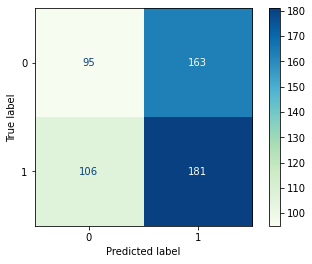

In [87]:
cm = confusion_matrix(y_test, y_pred, labels=lgbm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.37      0.41       258
           1       0.53      0.63      0.57       287

    accuracy                           0.51       545
   macro avg       0.50      0.50      0.49       545
weighted avg       0.50      0.51      0.50       545



In [89]:
lgbm_cv_train = cross_val_score(lgbm, X_train, y_train, cv=10) 
lgbm_cv_train.mean()

0.5300501271883884

In [90]:
lgbm_cv_test = cross_val_score(lgbm, X_test, y_test, cv=10) 
lgbm_cv_test.mean()

0.531986531986532

##### <font color = '#F2D8D8'>CREATE LAG 1 VARIABLE FOR VADER SENTIMENT COMPOUND

In [91]:
bitcoin

,label_rt_Btc,vader_clean_compound,vader_clean_polarity,vader_negative,vader_positive,vader_neutral
date,,,,,,
2014-09-17,0,0.589900,1.000000,0.000000,0.437000,0.563000
2014-09-18,0,0.000000,0.000000,0.000000,0.000000,0.000000
2014-09-19,0,0.000000,0.000000,0.000000,0.000000,0.000000
2014-09-22,1,0.000000,0.000000,0.000000,0.000000,0.000000
2014-09-23,1,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
2023-05-08,0,0.199254,0.496062,0.077538,0.326231,0.596205
2023-05-09,0,0.095414,0.313293,0.129093,0.275302,0.572302
2023-05-10,0,0.181463,0.762771,0.036657,0.276943,0.629229


In [92]:
lag = 1
bitcoin['vader_clean_compound_lag'] = bitcoin['vader_clean_compound'].shift(lag)
bitcoin.dropna(inplace=True)
bitcoin.head()

/var/folders/yv/j0g0g70d35zb6gycr0585f9c0000gn/T/ipykernel_1796/2109501987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin['vader_clean_compound_lag'] = bitcoin['vader_clean_compound'].shift(lag)
/var/folders/yv/j0g0g70d35zb6gycr0585f9c0000gn/T/ipykernel_1796/2109501987.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin.dropna(inplace=True)


,label_rt_Btc,vader_clean_compound,vader_clean_polarity,vader_negative,vader_positive,vader_neutral,vader_clean_compound_lag
date,,,,,,,
2014-09-18,0,0.0,0.0,0.0,0.0,0.0,0.5899
2014-09-19,0,0.0,0.0,0.0,0.0,0.0,0.0000
2014-09-22,1,0.0,0.0,0.0,0.0,0.0,0.0000
2014-09-23,1,0.0,0.0,0.0,0.0,0.0,0.0000
2014-09-24,0,0.0,0.0,0.0,0.0,0.0,0.0000


In [93]:
X = bitcoin.drop(['label_rt_Btc','vader_clean_compound'], axis = 1) 
y = bitcoin['label_rt_Btc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state=1234)

In [94]:
X_train.shape

(1633, 5)

In [95]:
X_test.shape

(545, 5)

#### Create a summary for all models used in analysis

In [96]:
clf = [
    AdaBoostClassifier(n_estimators=50, random_state=1234),
    RandomForestClassifier(random_state=1234),
    GaussianNB(),
    CalibratedClassifierCV(LinearSVC()), # SVC does not have predict_proba, and is wrapped into CalibratedClassifierCV
    DecisionTreeClassifier(random_state=1234),
    XGBClassifier(n_estimators=50, random_state=1234),
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors=3),
    CatBoostClassifier(iterations=100, random_state=42),
    LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=1234),
    BernoulliNB()
    ]

In [97]:
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in clf:    
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index,'Classifier'] = clf_name
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    clf_compare.loc[row_index, 'Precission'] = precision_score(y_test, predicted)
    clf_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
    clf_compare.loc[row_index, 'AUC'] = round(roc_auc_score(y_test, alg.predict_proba(X_test)[:,1]),5)
    clf_compare.loc[row_index, 'F1 Score'] = f1_score(y_test, predicted)
    row_index+=1

Learning rate set to 0.104925
0:	learn: 0.6908091	total: 769us	remaining: 76.2ms
1:	learn: 0.6884594	total: 1.7ms	remaining: 83.5ms
2:	learn: 0.6857954	total: 2.29ms	remaining: 74.1ms
3:	learn: 0.6848441	total: 3.1ms	remaining: 74.4ms
4:	learn: 0.6836059	total: 3.88ms	remaining: 73.7ms
5:	learn: 0.6817302	total: 4.69ms	remaining: 73.4ms
6:	learn: 0.6798057	total: 5.37ms	remaining: 71.4ms
7:	learn: 0.6784353	total: 6.05ms	remaining: 69.6ms
8:	learn: 0.6775875	total: 6.88ms	remaining: 69.5ms
9:	learn: 0.6766074	total: 7.58ms	remaining: 68.2ms
10:	learn: 0.6753630	total: 8.21ms	remaining: 66.4ms
11:	learn: 0.6747041	total: 9.1ms	remaining: 66.8ms
12:	learn: 0.6738964	total: 9.75ms	remaining: 65.2ms
13:	learn: 0.6724498	total: 10.4ms	remaining: 63.6ms
14:	learn: 0.6707635	total: 11.1ms	remaining: 63.2ms
15:	learn: 0.6697149	total: 12ms	remaining: 62.9ms
16:	learn: 0.6692171	total: 12.6ms	remaining: 61.7ms
17:	learn: 0.6683464	total: 13.4ms	remaining: 61.2ms
18:	learn: 0.6672686	total: 14.2

In [98]:
clf_compare.sort_values(by = ['AUC'], ascending = False, inplace = True)    
clf_compare

,Classifier,Train Accuracy,Test Accuracy,Precission,Recall,AUC,F1 Score
6,LogisticRegression,0.5566,0.5303,0.544928,0.655052,0.52564,0.594937
3,CalibratedClassifierCV,0.5493,0.5339,0.539952,0.777003,0.52525,0.637143
2,GaussianNB,0.5242,0.5138,0.547414,0.442509,0.52001,0.489403
5,XGBClassifier,0.8763,0.5174,0.536145,0.620209,0.51838,0.575121
9,LGBMClassifier,0.8487,0.5284,0.546296,0.616725,0.51240,0.579378
10,BernoulliNB,0.5260,0.5101,0.547619,0.400697,0.50872,0.462777
8,CatBoostClassifier,0.6987,0.5028,0.523529,0.620209,0.50566,0.567783
1,RandomForestClassifier,0.9314,0.5009,0.523810,0.574913,0.50032,0.548173
4,DecisionTreeClassifier,0.9314,0.4954,0.519737,0.550523,0.49624,0.534687
0,AdaBoostClassifier,0.6099,0.5119,0.529086,0.665505,0.49439,0.589506


#### <font color = '#5C8984'> LOGISTIC REGRESSION


In [99]:
# lr = LogisticRegression(C = 1e-05, solver ='newton-cg')
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

#### From a total of 545 observations, 289 were correctly classified 

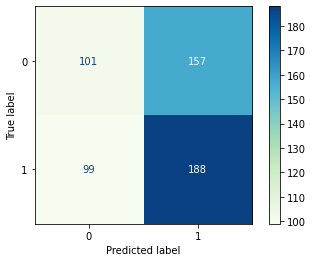

In [100]:
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [101]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.39      0.44       258
           1       0.54      0.66      0.59       287

    accuracy                           0.53       545
   macro avg       0.52      0.52      0.52       545
weighted avg       0.53      0.53      0.52       545



In [102]:
lr_cv_train = cross_val_score(lr, X_train, y_train, cv=5) 
lr_cv_train.mean()

0.528483518132868

In [103]:
lr_cv_test = cross_val_score(lr, X_test, y_test, cv=5) 
lr_cv_test.mean()

0.5137614678899082

#### <font color = '#5C8984'> K-NEAREST NEIGHBORS


In [104]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#### From a total of 545 observations, 268 were correctly classified 

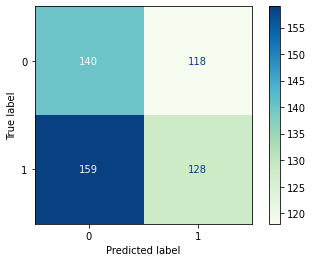

In [105]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.54      0.50       258
           1       0.52      0.45      0.48       287

    accuracy                           0.49       545
   macro avg       0.49      0.49      0.49       545
weighted avg       0.50      0.49      0.49       545



In [107]:
knn_cv_train = cross_val_score(knn, X_train, y_train, cv=5) 
knn_cv_train.mean()

0.5247969081255512

In [108]:
knn_cv_test = cross_val_score(knn, X_test, y_test, cv=5) 
knn_cv_test.mean()

0.4678899082568807

#### <font color = '#5C8984'> SUPPORT VECTOR MACHINES


In [109]:
svm_linear = SVC( kernel = 'linear')
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)

In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.59      0.54       258
           1       0.55      0.45      0.49       287

    accuracy                           0.52       545
   macro avg       0.52      0.52      0.51       545
weighted avg       0.52      0.52      0.51       545



#### From a total of 545 observations, 281 were correctly classified 

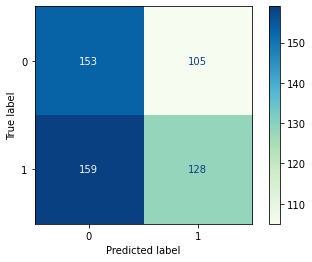

In [111]:
cm = confusion_matrix(y_test, y_pred, labels=svm_linear.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_linear.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [112]:
svm_linear_train_cv = cross_val_score(svm_linear, X_train, y_train, cv=5)
svm_linear_train_cv.mean()

0.5211346879045421

In [113]:
svm_linear_test_cv = cross_val_score(svm_linear, X_test, y_test, cv=5)
svm_linear_test_cv.mean()

0.526605504587156

#### <font color = '#5C8984'> DECISION TREES


In [114]:
tree = DecisionTreeClassifier(random_state=1234)
tree.fit(X_train, y_train) 
y_pred = tree.predict(X_test)

In [115]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.43      0.45       258
           1       0.52      0.55      0.53       287

    accuracy                           0.50       545
   macro avg       0.49      0.49      0.49       545
weighted avg       0.49      0.50      0.49       545



#### From a total of 545 observations, 270 were correctly classified 

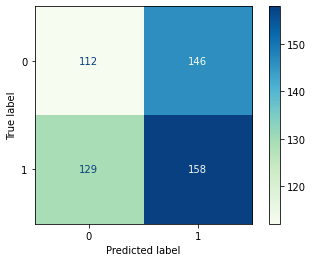

In [116]:
cm = confusion_matrix(y_test, y_pred, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [117]:
tree_cv_train = cross_val_score(tree, X_train, y_train, cv=10) 
tree_cv_train.mean()

0.5193101900344157

In [118]:
tree_cv_test = cross_val_score(tree, X_test, y_test, cv=10) 
tree_cv_test.mean()

0.486060606060606

#### <font color = '#5C8984'> RANDOM FOREST


In [119]:
rf = RandomForestClassifier(random_state=1234)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [120]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.42      0.44       258
           1       0.52      0.57      0.55       287

    accuracy                           0.50       545
   macro avg       0.50      0.50      0.50       545
weighted avg       0.50      0.50      0.50       545



#### From a total of 545 observations, 273 were correctly classified 

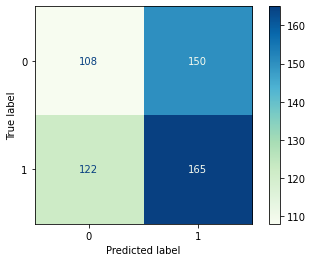

In [121]:
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [122]:
rf_cv_train = cross_val_score(rf, X_train, y_train, cv=5) 
rf_cv_train.mean()

0.527260276542654

In [123]:
rf_cv_test = cross_val_score(rf, X_test, y_test, cv=5) 
rf_cv_test.mean()

0.45871559633027525

#### <font color = '#5C8984'> MULTINOMIAL NAIVE BAYES


In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
X_minmax_train = scaler.fit_transform(X_train)
X_minmax_test = scaler.fit_transform(X_test)

naive = MultinomialNB()
# naive.fit(X_train, y_train)
# y_pred = naive.predict(X_test)
# Because Multinomial NB cannot work with negative values -- error: Negative values in data passed to MultinomialNB (input X)
#     we have to scale the features

naive.fit(X_minmax_train, y_train)
y_pred = naive.predict(X_minmax_test)

In [125]:
accuracy_score(y_test, y_pred)

0.5266055045871559

In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       258
           1       0.53      1.00      0.69       287

    accuracy                           0.53       545
   macro avg       0.26      0.50      0.34       545
weighted avg       0.28      0.53      0.36       545



/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

#### From a total of 545 observations, 287 were correctly classified 

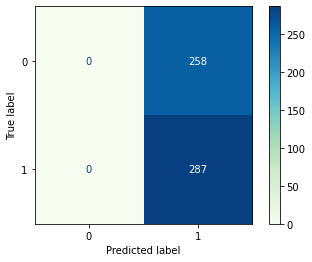

In [127]:
cm = confusion_matrix(y_test, y_pred, labels=naive.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=naive.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [128]:
# Accuracy of decision tree on train:
naive.score(X_minmax_train, y_train)

0.5272504592774035

In [129]:
# Accuracy of decision tree on test:
naive.score(X_minmax_test, y_test)

0.5266055045871559

In [130]:
# Precision of decision tree on test:
precision_score(y_test, y_pred)

0.5266055045871559

In [131]:
# Recall or senzitivity of naive bayes multinomial on test:
recall_score(y_test, y_pred)

1.0

In [132]:
# AUC of naive bayes multinomial on test:
round(roc_auc_score(y_test, naive.predict_proba(X_minmax_test)[:,1]),5)

0.51659

In [133]:
# F1 score of naive bayes multinomial on test:
f1_score(y_test, y_pred)

0.689903846153846

In [134]:
naive_cv_train = cross_val_score(naive, X_minmax_train, y_train, cv=10) 
naive_cv_train.mean()

0.5272519826425257

In [135]:
naive_cv_test = cross_val_score(naive, X_minmax_test, y_test, cv=10) 
naive_cv_test.mean()

0.5265993265993265

#### <font color = '#5C8984'> BERNOULLI NB

In [136]:
bernoulli =  BernoulliNB()
bernoulli.fit(X_train, y_train)
# Predict on the test set
y_pred = bernoulli.predict(X_test)

In [137]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.63      0.55       258
           1       0.55      0.40      0.46       287

    accuracy                           0.51       545
   macro avg       0.52      0.52      0.51       545
weighted avg       0.52      0.51      0.50       545



#### From a total of 545 observations, 287 were correctly classified 

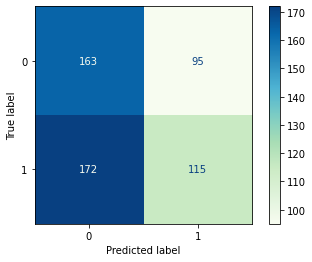

In [138]:
cm = confusion_matrix(y_test, y_pred, labels=bernoulli.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bernoulli.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [139]:
bernoulli_cv_train = cross_val_score(bernoulli, X_train, y_train, cv=5) 
bernoulli_cv_train.mean()

0.5187069660981971

In [140]:
bernoulli_cv_test = cross_val_score(bernoulli, X_test, y_test, cv=5) 
bernoulli_cv_test.mean()

0.471559633027523

#### <font color = '#5C8984'> GAUSSIAN NB

In [141]:
gaussian =  GaussianNB()
gaussian.fit(X_train, y_train)
# Predict on the test set
y_pred = gaussian.predict(X_test)

In [142]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.59      0.54       258
           1       0.55      0.44      0.49       287

    accuracy                           0.51       545
   macro avg       0.52      0.52      0.51       545
weighted avg       0.52      0.51      0.51       545



#### From a total of 545 observations, 280 were correctly classified

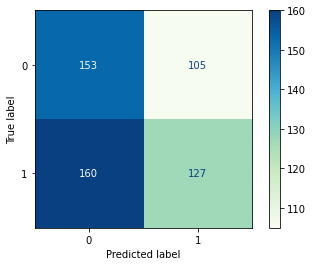

In [143]:
cm = confusion_matrix(y_test, y_pred, labels=gaussian.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gaussian.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [144]:
gaussian_cv_train = cross_val_score(gaussian, X_train, y_train, cv=5) 
gaussian_cv_train.mean()

0.5192923209695878

In [145]:
gaussian_cv_test = cross_val_score(gaussian, X_test, y_test, cv=5) 
gaussian_cv_test.mean()

0.4807339449541284

#### <font color = '#5C8984'> ADAPTIVE BOOSTING


In [146]:
# Create an AdaBoost classifier
adaboost = AdaBoostClassifier(n_estimators=50, random_state=1234)

# Train the classifier
adaboost.fit(X_train, y_train)

# Predict on the test set
y_pred = adaboost.predict(X_test)

In [147]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       258
           1       0.53      0.67      0.59       287

    accuracy                           0.51       545
   macro avg       0.50      0.50      0.49       545
weighted avg       0.51      0.51      0.50       545



#### From a total of 545 observations, 279 were correctly classified

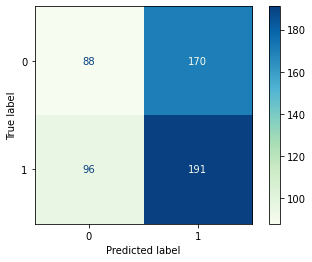

In [148]:
cm = confusion_matrix(y_test, y_pred, labels=adaboost.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=adaboost.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [149]:
adaboost_cv_train = cross_val_score(adaboost, X_train, y_train, cv=5) 
adaboost_cv_train.mean()

0.5211121742556425

In [150]:
adaboost_cv_test = cross_val_score(adaboost, X_test, y_test, cv=5) 
adaboost_cv_test.mean()

0.5100917431192661

#### <font color = '#5C8984'> eXTREME GRADIENT BOOSTING (XGB)


In [151]:
# Create an XGBoost classifier
xgb = XGBClassifier(n_estimators=50, random_state=1234)

# Train the classifier
xgb.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb.predict(X_test)

In [152]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.40      0.44       258
           1       0.54      0.62      0.58       287

    accuracy                           0.52       545
   macro avg       0.51      0.51      0.51       545
weighted avg       0.51      0.52      0.51       545



#### From a total of 545 observations, 282 were correctly classified

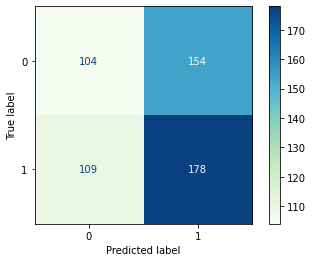

In [153]:
cm = confusion_matrix(y_test, y_pred, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [154]:
xgb_cv_train = cross_val_score(xgb, X_train, y_train, cv=10) 
xgb_cv_train.mean()

0.5125654646117013

In [155]:
xgb_cv_test = cross_val_score(xgb, X_test, y_test, cv=10) 
xgb_cv_test.mean()

0.4771380471380472

#### <font color = '#5C8984'> CATBOOST


In [156]:
# Create a CatBoost classifier
catboost = CatBoostClassifier(iterations=100, random_state=42)

# Train the classifier
catboost.fit(X_train, y_train)

# Predict on the test set
y_pred = catboost.predict(X_test)

Learning rate set to 0.104925
0:	learn: 0.6908091	total: 796us	remaining: 78.9ms
1:	learn: 0.6884594	total: 1.45ms	remaining: 71.2ms
2:	learn: 0.6857954	total: 2.17ms	remaining: 70.4ms
3:	learn: 0.6848441	total: 2.87ms	remaining: 69ms
4:	learn: 0.6836059	total: 3.57ms	remaining: 67.9ms
5:	learn: 0.6817302	total: 4.37ms	remaining: 68.4ms
6:	learn: 0.6798057	total: 5.21ms	remaining: 69.2ms
7:	learn: 0.6784353	total: 5.86ms	remaining: 67.4ms
8:	learn: 0.6775875	total: 6.69ms	remaining: 67.6ms
9:	learn: 0.6766074	total: 7.34ms	remaining: 66.1ms
10:	learn: 0.6753630	total: 8.13ms	remaining: 65.8ms
11:	learn: 0.6747041	total: 8.81ms	remaining: 64.6ms
12:	learn: 0.6738964	total: 9.51ms	remaining: 63.6ms
13:	learn: 0.6724498	total: 10.1ms	remaining: 62.3ms
14:	learn: 0.6707635	total: 10.9ms	remaining: 61.9ms
15:	learn: 0.6697149	total: 11.6ms	remaining: 60.7ms
16:	learn: 0.6692171	total: 12.3ms	remaining: 60.1ms
17:	learn: 0.6683464	total: 13.2ms	remaining: 60ms
18:	learn: 0.6672686	total: 13.

In [157]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.37      0.41       258
           1       0.52      0.62      0.57       287

    accuracy                           0.50       545
   macro avg       0.50      0.50      0.49       545
weighted avg       0.50      0.50      0.50       545



#### From a total of 545 observations, 274 were correctly classified 

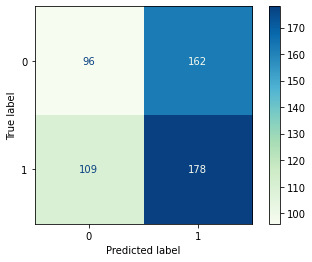

In [158]:
cm = confusion_matrix(y_test, y_pred, labels=catboost.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=catboost.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [159]:
catboost_cv_train = cross_val_score(catboost, X_train, y_train, cv=10) 
catboost_cv_train.mean()

Learning rate set to 0.100289
0:	learn: 0.6910903	total: 606us	remaining: 60ms
1:	learn: 0.6889517	total: 1.4ms	remaining: 68.5ms
2:	learn: 0.6868413	total: 2.07ms	remaining: 67ms
3:	learn: 0.6853540	total: 2.92ms	remaining: 70.1ms
4:	learn: 0.6830478	total: 3.94ms	remaining: 74.9ms
5:	learn: 0.6804766	total: 4.72ms	remaining: 74ms
6:	learn: 0.6787452	total: 5.51ms	remaining: 73.2ms
7:	learn: 0.6768461	total: 6.22ms	remaining: 71.5ms
8:	learn: 0.6761231	total: 6.86ms	remaining: 69.3ms
9:	learn: 0.6748508	total: 7.68ms	remaining: 69.2ms
10:	learn: 0.6738849	total: 8.45ms	remaining: 68.3ms
11:	learn: 0.6721653	total: 9.26ms	remaining: 67.9ms
12:	learn: 0.6706962	total: 9.99ms	remaining: 66.9ms
13:	learn: 0.6695115	total: 10.8ms	remaining: 66.5ms
14:	learn: 0.6686637	total: 11.6ms	remaining: 65.7ms
15:	learn: 0.6674133	total: 12.3ms	remaining: 64.4ms
16:	learn: 0.6667092	total: 12.9ms	remaining: 63.2ms
17:	learn: 0.6656595	total: 13.6ms	remaining: 62.1ms
18:	learn: 0.6644526	total: 14.3ms

10:	learn: 0.6733533	total: 8.27ms	remaining: 66.9ms
11:	learn: 0.6722570	total: 9.21ms	remaining: 67.5ms
12:	learn: 0.6710206	total: 10.2ms	remaining: 68.1ms
13:	learn: 0.6699160	total: 11ms	remaining: 67.3ms
14:	learn: 0.6692179	total: 11.6ms	remaining: 65.7ms
15:	learn: 0.6681717	total: 12.1ms	remaining: 63.5ms
16:	learn: 0.6669466	total: 12.7ms	remaining: 61.9ms
17:	learn: 0.6656732	total: 13.3ms	remaining: 60.7ms
18:	learn: 0.6647984	total: 14.1ms	remaining: 60ms
19:	learn: 0.6637381	total: 14.8ms	remaining: 59.1ms
20:	learn: 0.6632100	total: 15.3ms	remaining: 57.7ms
21:	learn: 0.6620921	total: 15.9ms	remaining: 56.3ms
22:	learn: 0.6613323	total: 16.6ms	remaining: 55.5ms
23:	learn: 0.6606779	total: 17.2ms	remaining: 54.5ms
24:	learn: 0.6598562	total: 18.2ms	remaining: 54.6ms
25:	learn: 0.6590999	total: 18.9ms	remaining: 53.7ms
26:	learn: 0.6586231	total: 19.4ms	remaining: 52.5ms
27:	learn: 0.6576587	total: 20.2ms	remaining: 51.9ms
28:	learn: 0.6569715	total: 20.8ms	remaining: 50.9

80:	learn: 0.6226940	total: 44.4ms	remaining: 10.4ms
81:	learn: 0.6223751	total: 45.2ms	remaining: 9.93ms
82:	learn: 0.6219259	total: 45.8ms	remaining: 9.38ms
83:	learn: 0.6214470	total: 46.3ms	remaining: 8.82ms
84:	learn: 0.6211002	total: 46.9ms	remaining: 8.28ms
85:	learn: 0.6207351	total: 47.4ms	remaining: 7.72ms
86:	learn: 0.6202907	total: 47.9ms	remaining: 7.16ms
87:	learn: 0.6197339	total: 48.5ms	remaining: 6.61ms
88:	learn: 0.6193575	total: 49ms	remaining: 6.06ms
89:	learn: 0.6187941	total: 49.5ms	remaining: 5.5ms
90:	learn: 0.6181089	total: 50.1ms	remaining: 4.95ms
91:	learn: 0.6177103	total: 50.6ms	remaining: 4.4ms
92:	learn: 0.6172868	total: 51.1ms	remaining: 3.84ms
93:	learn: 0.6169668	total: 51.6ms	remaining: 3.29ms
94:	learn: 0.6165123	total: 52.3ms	remaining: 2.75ms
95:	learn: 0.6158939	total: 52.9ms	remaining: 2.2ms
96:	learn: 0.6154741	total: 53.4ms	remaining: 1.65ms
97:	learn: 0.6144585	total: 53.9ms	remaining: 1.1ms
98:	learn: 0.6138750	total: 54.4ms	remaining: 549us


51:	learn: 0.6436169	total: 30.2ms	remaining: 27.9ms
52:	learn: 0.6430601	total: 31ms	remaining: 27.5ms
53:	learn: 0.6425851	total: 31.5ms	remaining: 26.8ms
54:	learn: 0.6422368	total: 32.1ms	remaining: 26.3ms
55:	learn: 0.6415253	total: 32.6ms	remaining: 25.6ms
56:	learn: 0.6406410	total: 33.1ms	remaining: 24.9ms
57:	learn: 0.6394900	total: 33.6ms	remaining: 24.3ms
58:	learn: 0.6388548	total: 34.1ms	remaining: 23.7ms
59:	learn: 0.6383715	total: 34.6ms	remaining: 23.1ms
60:	learn: 0.6378035	total: 35.3ms	remaining: 22.5ms
61:	learn: 0.6373786	total: 35.9ms	remaining: 22ms
62:	learn: 0.6367388	total: 36.5ms	remaining: 21.5ms
63:	learn: 0.6360188	total: 37.1ms	remaining: 20.9ms
64:	learn: 0.6355748	total: 37.7ms	remaining: 20.3ms
65:	learn: 0.6351048	total: 38.2ms	remaining: 19.7ms
66:	learn: 0.6345943	total: 38.7ms	remaining: 19.1ms
67:	learn: 0.6342968	total: 39.3ms	remaining: 18.5ms
68:	learn: 0.6338368	total: 39.8ms	remaining: 17.9ms
69:	learn: 0.6332315	total: 40.4ms	remaining: 17.3

23:	learn: 0.6644288	total: 12.4ms	remaining: 39.2ms
24:	learn: 0.6635996	total: 13ms	remaining: 39.1ms
25:	learn: 0.6625040	total: 13.7ms	remaining: 38.9ms
26:	learn: 0.6614684	total: 14.2ms	remaining: 38.5ms
27:	learn: 0.6603999	total: 14.9ms	remaining: 38.2ms
28:	learn: 0.6596925	total: 15.5ms	remaining: 38ms
29:	learn: 0.6588196	total: 16.1ms	remaining: 37.6ms
30:	learn: 0.6580810	total: 16.6ms	remaining: 36.9ms
31:	learn: 0.6576174	total: 17.2ms	remaining: 36.5ms
32:	learn: 0.6566981	total: 17.8ms	remaining: 36.2ms
33:	learn: 0.6557902	total: 18.3ms	remaining: 35.6ms
34:	learn: 0.6550436	total: 18.9ms	remaining: 35.1ms
35:	learn: 0.6542901	total: 19.4ms	remaining: 34.5ms
36:	learn: 0.6533981	total: 19.9ms	remaining: 33.9ms
37:	learn: 0.6529057	total: 20.5ms	remaining: 33.4ms
38:	learn: 0.6521296	total: 21ms	remaining: 32.8ms
39:	learn: 0.6516367	total: 21.5ms	remaining: 32.2ms
40:	learn: 0.6508079	total: 22ms	remaining: 31.6ms
41:	learn: 0.6501058	total: 22.5ms	remaining: 31.1ms
4

99:	learn: 0.6222660	total: 54.1ms	remaining: 0us


0.5352536286099057

In [160]:
catboost_cv_test = cross_val_score(catboost, X_test, y_test, cv=10) 
catboost_cv_test.mean()

Learning rate set to 0.062755
0:	learn: 0.6914705	total: 566us	remaining: 56.1ms
1:	learn: 0.6889696	total: 1.11ms	remaining: 54.4ms
2:	learn: 0.6863179	total: 1.72ms	remaining: 55.6ms
3:	learn: 0.6855013	total: 2.17ms	remaining: 52.1ms
4:	learn: 0.6843463	total: 2.6ms	remaining: 49.4ms
5:	learn: 0.6831195	total: 3.05ms	remaining: 47.8ms
6:	learn: 0.6814014	total: 3.47ms	remaining: 46ms
7:	learn: 0.6794299	total: 3.9ms	remaining: 44.9ms
8:	learn: 0.6787847	total: 4.33ms	remaining: 43.8ms
9:	learn: 0.6770701	total: 4.74ms	remaining: 42.7ms
10:	learn: 0.6760640	total: 5.16ms	remaining: 41.7ms
11:	learn: 0.6745444	total: 5.58ms	remaining: 40.9ms
12:	learn: 0.6730683	total: 5.99ms	remaining: 40.1ms
13:	learn: 0.6716906	total: 6.45ms	remaining: 39.6ms
14:	learn: 0.6706321	total: 6.86ms	remaining: 38.9ms
15:	learn: 0.6693091	total: 7.27ms	remaining: 38.2ms
16:	learn: 0.6687008	total: 7.7ms	remaining: 37.6ms
17:	learn: 0.6664420	total: 8.11ms	remaining: 37ms
18:	learn: 0.6653356	total: 8.58ms

93:	learn: 0.6035841	total: 46.6ms	remaining: 2.98ms
94:	learn: 0.6030300	total: 47.3ms	remaining: 2.49ms
95:	learn: 0.6022500	total: 47.9ms	remaining: 2ms
96:	learn: 0.6019912	total: 48.5ms	remaining: 1.5ms
97:	learn: 0.6011153	total: 49ms	remaining: 999us
98:	learn: 0.6005827	total: 49.4ms	remaining: 499us
99:	learn: 0.6000563	total: 49.9ms	remaining: 0us
Learning rate set to 0.062755
0:	learn: 0.6918175	total: 457us	remaining: 45.3ms
1:	learn: 0.6891420	total: 911us	remaining: 44.6ms
2:	learn: 0.6875548	total: 1.52ms	remaining: 49ms
3:	learn: 0.6856399	total: 2.07ms	remaining: 49.7ms
4:	learn: 0.6845611	total: 2.49ms	remaining: 47.3ms
5:	learn: 0.6830269	total: 2.92ms	remaining: 45.7ms
6:	learn: 0.6809735	total: 3.48ms	remaining: 46.3ms
7:	learn: 0.6797381	total: 3.91ms	remaining: 45ms
8:	learn: 0.6786286	total: 4.35ms	remaining: 44ms
9:	learn: 0.6768336	total: 4.77ms	remaining: 42.9ms
10:	learn: 0.6749098	total: 5.2ms	remaining: 42.1ms
11:	learn: 0.6729809	total: 5.63ms	remaining: 

51:	learn: 0.6350898	total: 24.3ms	remaining: 22.4ms
52:	learn: 0.6341645	total: 25ms	remaining: 22.2ms
53:	learn: 0.6334604	total: 25.8ms	remaining: 22ms
54:	learn: 0.6329136	total: 26.4ms	remaining: 21.6ms
55:	learn: 0.6320309	total: 26.8ms	remaining: 21.1ms
56:	learn: 0.6310901	total: 27.2ms	remaining: 20.6ms
57:	learn: 0.6307973	total: 27.7ms	remaining: 20.1ms
58:	learn: 0.6303331	total: 28.2ms	remaining: 19.6ms
59:	learn: 0.6290114	total: 28.6ms	remaining: 19.1ms
60:	learn: 0.6285468	total: 29.1ms	remaining: 18.6ms
61:	learn: 0.6278344	total: 29.6ms	remaining: 18.1ms
62:	learn: 0.6266947	total: 30ms	remaining: 17.6ms
63:	learn: 0.6255178	total: 30.4ms	remaining: 17.1ms
64:	learn: 0.6247002	total: 30.9ms	remaining: 16.6ms
65:	learn: 0.6236861	total: 31.6ms	remaining: 16.3ms
66:	learn: 0.6226336	total: 32.4ms	remaining: 16ms
67:	learn: 0.6219297	total: 33ms	remaining: 15.5ms
68:	learn: 0.6211127	total: 33.4ms	remaining: 15ms
69:	learn: 0.6206419	total: 33.9ms	remaining: 14.5ms
70:	l

55:	learn: 0.6279361	total: 26ms	remaining: 20.5ms
56:	learn: 0.6271670	total: 26.7ms	remaining: 20.1ms
57:	learn: 0.6267197	total: 27.2ms	remaining: 19.7ms
58:	learn: 0.6257886	total: 27.6ms	remaining: 19.2ms
59:	learn: 0.6251067	total: 28.1ms	remaining: 18.8ms
60:	learn: 0.6247863	total: 28.6ms	remaining: 18.3ms
61:	learn: 0.6237622	total: 29ms	remaining: 17.8ms
62:	learn: 0.6225321	total: 29.5ms	remaining: 17.3ms
63:	learn: 0.6216985	total: 30ms	remaining: 16.9ms
64:	learn: 0.6208132	total: 30.5ms	remaining: 16.4ms
65:	learn: 0.6201818	total: 30.9ms	remaining: 15.9ms
66:	learn: 0.6193057	total: 31.4ms	remaining: 15.5ms
67:	learn: 0.6185752	total: 31.9ms	remaining: 15ms
68:	learn: 0.6181028	total: 32.4ms	remaining: 14.6ms
69:	learn: 0.6175125	total: 32.8ms	remaining: 14.1ms
70:	learn: 0.6169810	total: 33.2ms	remaining: 13.6ms
71:	learn: 0.6165425	total: 33.7ms	remaining: 13.1ms
72:	learn: 0.6152876	total: 34.3ms	remaining: 12.7ms
73:	learn: 0.6147204	total: 34.9ms	remaining: 12.3ms
7

20:	learn: 0.6636474	total: 9.19ms	remaining: 34.6ms
21:	learn: 0.6620426	total: 9.81ms	remaining: 34.8ms
22:	learn: 0.6607603	total: 10.3ms	remaining: 34.4ms
23:	learn: 0.6598236	total: 10.7ms	remaining: 33.9ms
24:	learn: 0.6588892	total: 11.1ms	remaining: 33.4ms
25:	learn: 0.6579470	total: 11.6ms	remaining: 32.9ms
26:	learn: 0.6568474	total: 12ms	remaining: 32.5ms
27:	learn: 0.6550172	total: 12.5ms	remaining: 32.1ms
28:	learn: 0.6541339	total: 12.9ms	remaining: 31.7ms
29:	learn: 0.6524182	total: 13.4ms	remaining: 31.2ms
30:	learn: 0.6508724	total: 13.8ms	remaining: 30.8ms
31:	learn: 0.6499543	total: 14.3ms	remaining: 30.4ms
32:	learn: 0.6492017	total: 14.8ms	remaining: 30ms
33:	learn: 0.6484435	total: 15.2ms	remaining: 29.6ms
34:	learn: 0.6478736	total: 15.6ms	remaining: 29.1ms
35:	learn: 0.6470550	total: 16.1ms	remaining: 28.7ms
36:	learn: 0.6463125	total: 16.6ms	remaining: 28.2ms
37:	learn: 0.6453873	total: 17ms	remaining: 27.7ms
38:	learn: 0.6444711	total: 17.4ms	remaining: 27.2ms

12:	learn: 0.6738093	total: 6.23ms	remaining: 41.7ms
13:	learn: 0.6725442	total: 6.79ms	remaining: 41.7ms
14:	learn: 0.6716972	total: 7.23ms	remaining: 41ms
15:	learn: 0.6703260	total: 7.65ms	remaining: 40.2ms
16:	learn: 0.6691754	total: 8.08ms	remaining: 39.4ms
17:	learn: 0.6681356	total: 8.51ms	remaining: 38.8ms
18:	learn: 0.6668485	total: 8.95ms	remaining: 38.2ms
19:	learn: 0.6659024	total: 9.37ms	remaining: 37.5ms
20:	learn: 0.6650409	total: 9.79ms	remaining: 36.8ms
21:	learn: 0.6638365	total: 10.2ms	remaining: 36.2ms
22:	learn: 0.6621489	total: 10.7ms	remaining: 35.7ms
23:	learn: 0.6609593	total: 11.1ms	remaining: 35.2ms
24:	learn: 0.6599551	total: 11.5ms	remaining: 34.6ms
25:	learn: 0.6591132	total: 11.9ms	remaining: 34ms
26:	learn: 0.6576568	total: 12.4ms	remaining: 33.5ms
27:	learn: 0.6562066	total: 12.9ms	remaining: 33.1ms
28:	learn: 0.6550040	total: 13.3ms	remaining: 32.6ms
29:	learn: 0.6538881	total: 13.9ms	remaining: 32.4ms
30:	learn: 0.6521329	total: 14.5ms	remaining: 32.3

0.4805050505050505

#### <font color = '#5C8984'> LIGHT GRADIENT BOOSTING MACHINE (LGBM)

In [161]:
lgbm = LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=1234)
lgbm.fit(X_train, y_train, verbose=20, eval_metric='logloss')
y_pred = lgbm.predict(X_test)

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [162]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.43      0.46       258
           1       0.55      0.62      0.58       287

    accuracy                           0.53       545
   macro avg       0.52      0.52      0.52       545
weighted avg       0.53      0.53      0.52       545



#### From a total of 545 observations, 288 were correctly classified 

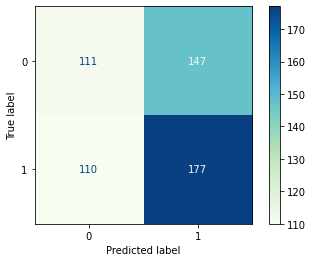

In [163]:
cm = confusion_matrix(y_test, y_pred, labels=lgbm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [164]:
lgbm_cv_train = cross_val_score(lgbm, X_train, y_train, cv=10) 
lgbm_cv_train.mean()

0.5242032021547208

In [165]:
lgbm_cv_test = cross_val_score(lgbm, X_test, y_test, cv=10) 
lgbm_cv_test.mean()

0.43878787878787884